# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Your work here.

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


In [3]:
df.shape

(130, 3)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
import scipy
from scipy import stats
from scipy.stats import norm
import math
import numpy as np

# 1. Is the distribution of body temperatures normal?

There are three ways to test normality: 
1. Original population is normal 
2. Sample size is reasonably large (n >= 30). Here we have 130 people's data and it is larger than our standard 30. It fulfills normal distribution.
3. Compare data's ECDF and theoretical CDF in a graphical way. Following codes are provided

In [34]:
mean = np.mean(df.temperature)
sd = np.std(df.temperature)

In [6]:
normal = np.random.normal(mean, sd, size=10000)

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / float(n)

    return x, y

In [8]:
theor_x, theor_y = ecdf(normal)
x, y = ecdf(df.temperature)

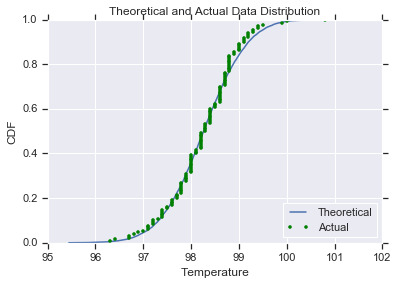

In [114]:
sns.set()
plt.plot(theor_x, theor_y)
plt.plot(x, y, marker='.', linestyle='none', color='green')
plt.xlabel('Temperature')
plt.ylabel('CDF')
plt.title('Theoretical and Actual Data Distribution')
plt.legend(('Theoretical', 'Actual'), loc='lower right')

# 2. Is the sample size large? Are the observations independent?

** Ans: Yes, the sample size can be considered to be large since it exceeds 30. The data has 130 people's body temperature and it is 10% lower than the human population. Based on 10% rule, the sample size is independent. **

# 3. Is the true population mean really 98.6 degrees F?

## First, try a bootstrap hypothesis test.
** Ans: From the confidence interval of bootstrapping result, 98.6 is not existed in the PDF. It indicates that the true population mean is highly impossible to be 98.6 degrees F **

In [19]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [20]:
def draw_bs_reps(data, func, size):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [21]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(df.temperature, np.mean, 10000)

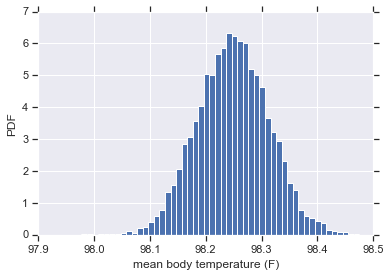

In [86]:
plt.hist(bs_replicates, bins=50, normed=True)
plt.xlabel('mean body temperature (F)')
plt.ylabel('PDF')

## Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

** Ans: Here I would use a one-sample test since I just want to know is it equal or not equal to 98.6. **
* Null hypothesis: mean human body temperature equal to 98.6
* Alternative hypothesis: mean human body temperature not equal to 98.6  

## In this situation, is it appropriate to use the $t$ or $z$ statistic?

** Ans: We can use z-statistic, because the sample size is larger than 30. The sample size is large enough to assume that the sample mean is closed to population mean. The result shows that t-statistic has similar values to z-statistic **

## Now try using the other test. How is the result be different? Why?
** Ans: The results are pretty similar, and both of them reject null hypothesis. It is because the sample size is larget enough **

In [57]:
se = sd / np.sqrt(len(df.temperature))

In [50]:
t_statistic = (mean-98.6) / se
print 't-statistic:' + ' ' + str(t_statistic)

t-statistic: -5.47592520208


In [66]:
t_statistic_p = stats.t.sf(np.abs(t_statistic), len(df.temperature)-1)
print 't-statistic p value:' + ' ' + str(t_statistic_p)

t-statistic p value: 1.0943732312e-07


In [58]:
z_statistic = (mean-98.6) / se
print 'z-statistic:' + ' ' + str(z_statistic)

z-statistic: -5.47592520208


In [64]:
z_statistic_p = scipy.stats.norm.sf(abs(z_statistic))
print 'z-statistic p value:' + ' ' + str(z_statistic_p)

z-statistic p value: 2.17615758294e-08


# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 

## Which one is the correct one to use? 
** Ans: t-statistic is more correct to use when the sample size is lower than 30. **    


## What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
** Ans: The sample size impacts both statistics a lot. **

In [78]:
np.random.seed(630)
random10 = np.random.choice(df.temperature, 10)

In [79]:
random10

array([  98.7,  100.8,   98.4,   98.2,   96.3,   99.5,   98.3,   98.2,
         98.4,   97.1])

In [80]:
mean10 = np.mean(random10)
sd10 = np.std(random10)
se10 = sd10 / np.sqrt(len(random10))

In [81]:
t_statistic10 = (mean10-98.6) / se10
print 't-statistic (size10):' + ' ' + str(t_statistic10)

t-statistic (size10): -0.57693614017


In [82]:
t_statistic10_p = stats.t.sf(np.abs(t_statistic10), len(random10)-1)
print 't-statistic p value (size10):' + ' ' + str(t_statistic10_p)

t-statistic p value (size10): 0.289062934612


In [83]:
z_statistic10 = (mean10-98.6) / se10
print 'z-statistic (size10):' + ' ' + str(z_statistic10)

z-statistic (size10): -0.57693614017


In [84]:
z_statistic10_p = scipy.stats.norm.sf(abs(z_statistic10))
print 'z-statistic p value (size10):' + ' ' + str(z_statistic10_p)

z-statistic p value (size10): 0.281991297814


# 5. At what temperature should we consider someone's temperature to be "abnormal"?


## As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
** Ans: Here we cant not use permutation test since we don't have a list of data for mean body temperature 98.6 F. We want to compare a list of data to a singel mean by constructing a shifted data. In terms of the bootstrap approach and the frequentist approach, low p-value here again rejects the null hypothesis.**

In [88]:
# shifting known data to cnostruct a list of data for mean 98.6
shifted_data = df.temperature - mean + 98.6

In [89]:
# Construct 10000 bootstrpping replicates (mean)
bs_replicates_test = draw_bs_reps(shifted_data, np.mean, 10000)

In [92]:
p = np.sum(bs_replicates_test <= mean) / 10000.0
print(p)

0.0


## Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
** Ans: In Q2, we already produced bootstrapping replicates. Here we can just calculate the confidence interval by np.percentile(). I would consider the temperature which is not within this confidence interval is abnormal.**

In [23]:
np.percentile(bs_replicates, [2.5, 97.5])

array([ 98.12692308,  98.37538462])

# 6. Is there a significant difference between males and females in normal temperature?

## What testing approach did you use and why?
** Ans: Permutaion can be useful for comparing two identical distribution. Here we have 65 female temperatures and 65 male temperatures. **

In [106]:
# Check how the amount of male temp and female temp
male = df[df.gender == 'M']['temperature'].values
female = df[df.gender == 'F']['temperature'].values

In [109]:
print len(male), len(female)

65 65


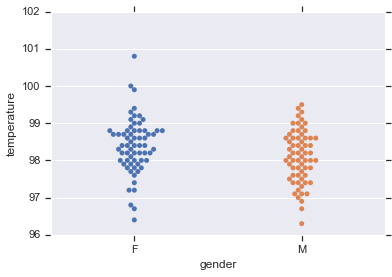

In [103]:
# EDA first
sns.swarmplot(x='gender', y='temperature', data=df)

In [102]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [101]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [104]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [111]:
# Compute difference of mean temperature from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(male, female)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(male, female, diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates <= empirical_diff_means) / float(len(perm_replicates))

# Print the result
print('p-value =', p)

('p-value =', 0.012999999999999999)


In [123]:
empirical_diff_means

-0.28923076923076962

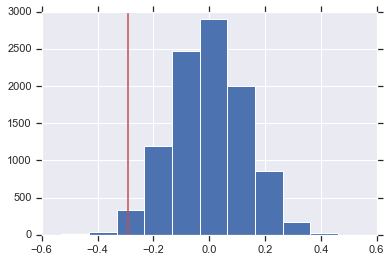

In [124]:
plt.hist(perm_replicates)
plt.axvline(x=-0.28923076923076962, color='r')

## Write a story with your conclusion in the context of the original problem.
** Ans: If we want to know whether the mean temperature between males and females is significantly different, we basically want to know whether the difference between them is zero. Therefore, we set our null hypothesis is the mean temperature difference is zero and alternative hypothesis is the mean temperature difference is not zero. I use simulated permutaions for hypothesis test. The difference of mean temperature simulated underthe null hypothesis is from -0.4 to 0.4 (blue histogram). The red line, empirical_diff_means, is our observed test statistic. The probably to observe a test statistic equally or more extreme than the one we observed is rare (p-value is ~1%). It clearly indicates that null hypothesis is not true and it needs to be rejected. In conclusion, there is a significant difference between male and female body temperature. **